In [67]:
import copy
import json
import os
import numpy as np
import kernel
import configuration
import calibration
from matplotlib import pyplot as plt

In [68]:
def float_to_str(nr: float):
    nr = float(nr)
    return str(nr).replace('.', '')

def min_sigma_of_axis(data, axis):
    return data[np.where(data[:, axis] == np.nanmin(data[:, axis]))][0]

def make_header(path, data, case):
    print(f'Minimize values in {case} from:')
    print(path)
    print(f'{"sigma":10}|{"mean force":10}|{"var force":10}|{"mean cos":10}|{"var cos":10}|{"energy":10}|')
    for i in (1, 5): #range(1, 6):
        line = ""
        for val in min_sigma_of_axis(data, i):
            line += f'{val:10.6f}|'
        print(line)    
    
def plot4(data: np.array, max_n, title=""):
    fig, axs = plt.subplots(3, 2, figsize = (20, 12))
    fig.suptitle(title, fontsize=20)
    titles = ["force mean", "force variance", "mean $cos$", "var $cos$", "energy difference"]
    
    for i, ax in enumerate(axs.flatten()):
        ax.scatter(data[:max_n, 0], data[:max_n, i+1])
        ax.grid()
        ax.set(xlabel="$\sigma$", title=titles[i])
        if i in (0, 1):
            ax.set_yscale('log')
        if i == 4:
            break
            

def analyze(n: int, min_sigma, max_sigma, modi, stepsize, max_n=-1):
    print(f'{"steps":10}={n:5}')
    print(f'{"min sigma":10}={min_sigma:5}')
    print(f'{"max sigma":10}={max_sigma:5}')
    print(f'{"grid":10}={abs(min_sigma - max_sigma)/n:5}')
    print(f'{"configs":10}={1000 / stepsize:5}')
    print(f'{"modi":10}={modi:5}\n')
    
    fit_path = f'test_data/test_parameters/single_config/fit_{n}_({float_to_str(min_sigma)}-{float_to_str(max_sigma)})_m{modi}_s{stepsize}.dat'
    fit = np.loadtxt(fit_path)
    make_header(fit_path, fit, 'fit')
    print("\n")

    pred_path = f'test_data/test_parameters/single_config/prediction_{n}_({float_to_str(min_sigma)}-{float_to_str(max_sigma)})_m{modi}_s{stepsize}.dat'
    prediction = np.loadtxt(pred_path)
    make_header(pred_path, prediction, 'prediction')
        
    plot4(fit, max_n, "Fitting")
    plot4(prediction, max_n, "Prediction")

# Analyzing the influence of $\sigma$ in correspondence to nr of modi
## 10 modi

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-100)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.368424|  0.463836|  1.235973|  0.920327|  0.020900|  0.004141|
  0.526325|  1.363313| 23.030844|  0.707313|  0.125589|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-100)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.368424|  0.371539|  0.060844|  0.920764|  0.015383|  0.003338|
  1.578956|  1.701296|  2.070049|  0.407933|  0.343952|  0.000686|


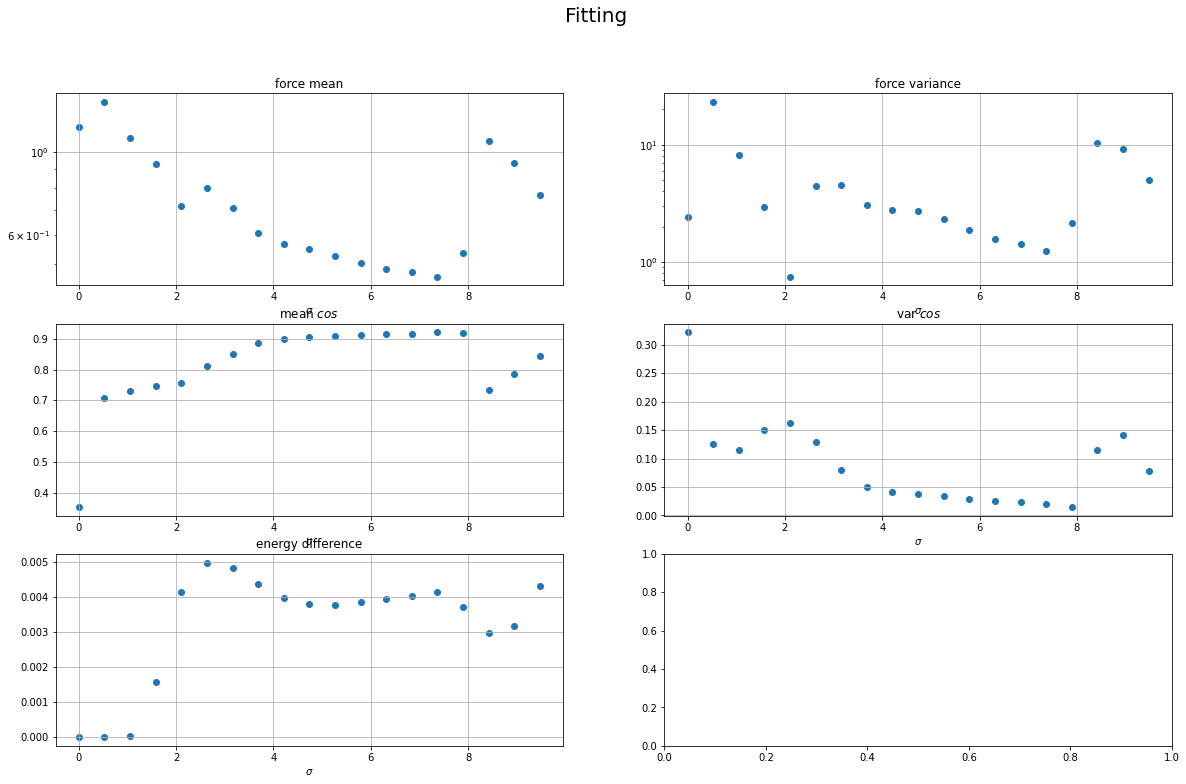

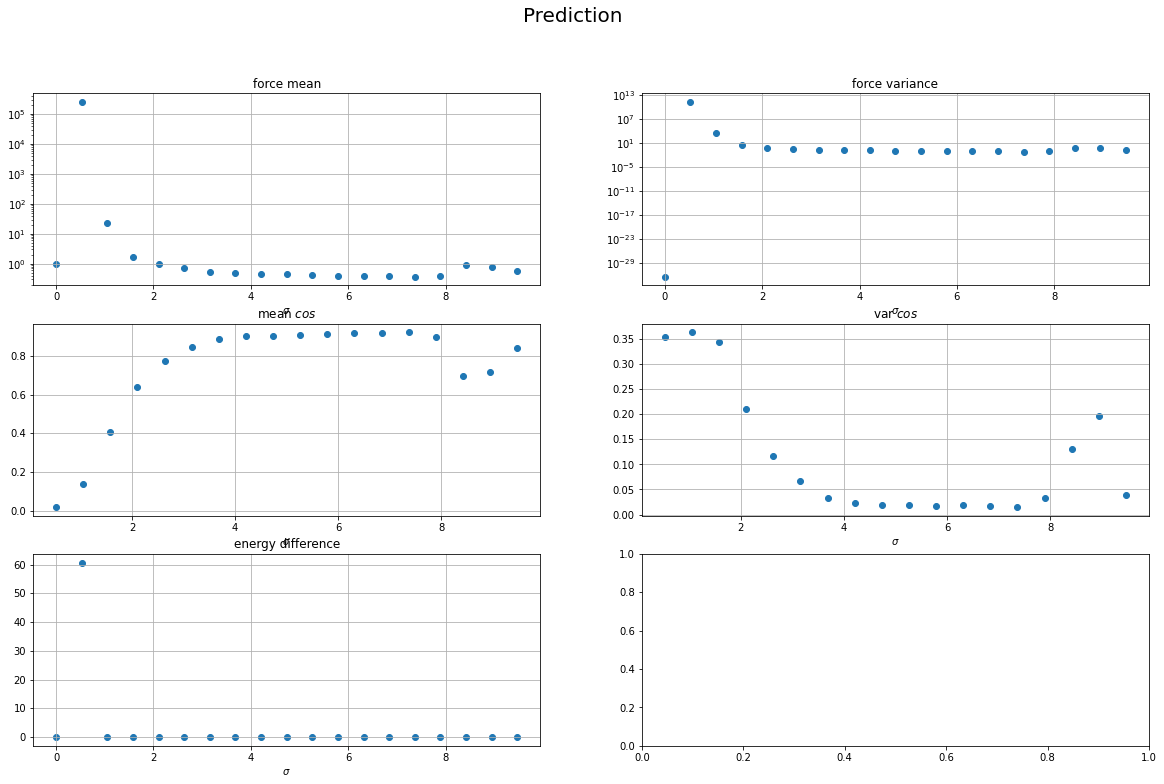

In [69]:
analyze(20, 0, 10, 10, 100)

steps     =   10
min sigma =    0
max sigma =    1
grid      =  0.1
configs   = 10.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/single_config/fit_10_(00-10)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  0.111120|  1.000000|  0.000000|  0.307274|  0.280703|  0.000000|
  0.111120|  1.000000|  0.000000|  0.307274|  0.280703|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_10_(00-10)_m10_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.002355|
  0.000010|  1.000000|  0.000000|       nan|       nan|  0.002355|


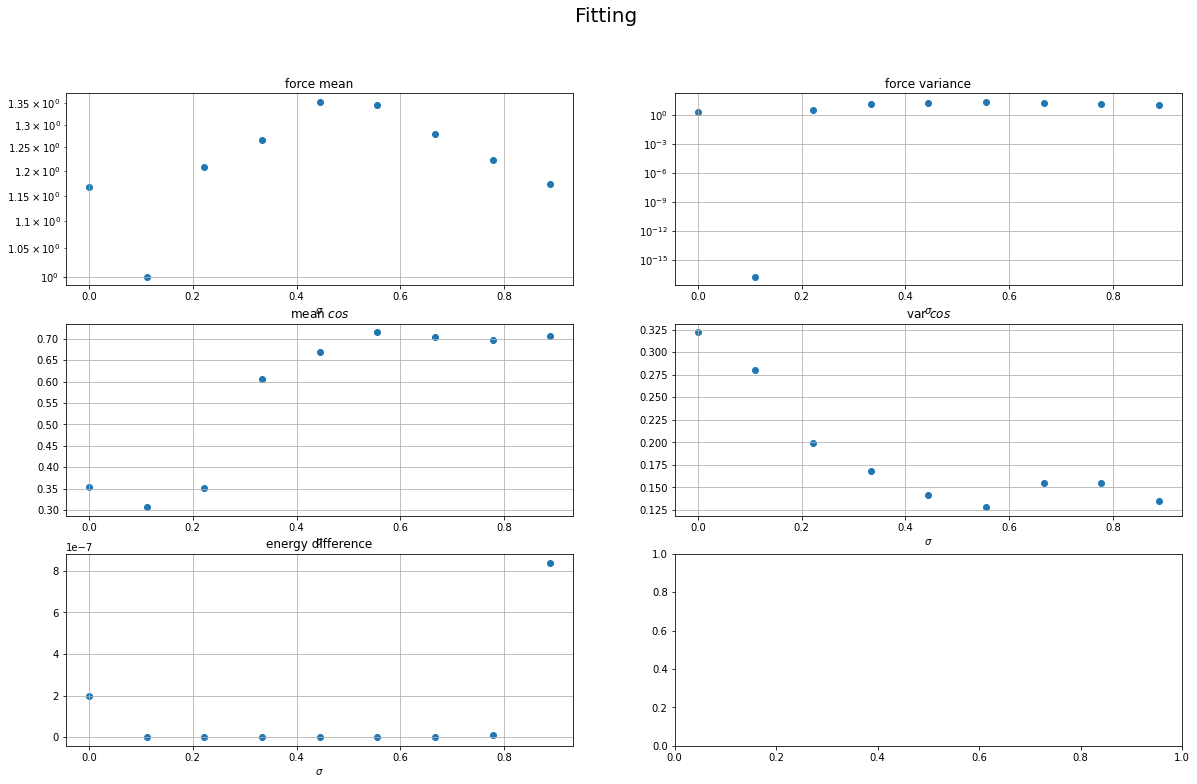

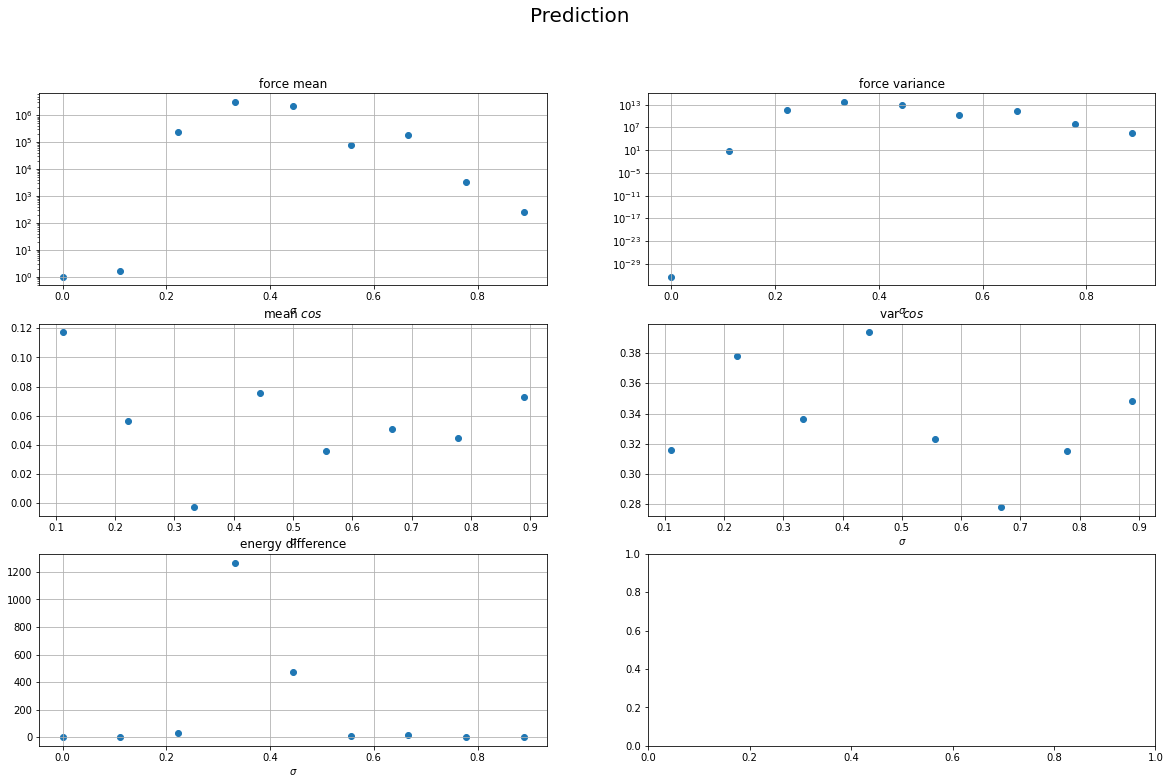

In [70]:
analyze(10, 0, 1, 10, 100)

## modi = 2

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =    2

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-100)_m2_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  0.000010|  1.084260|  1.703590|  0.465646|  0.202668|  0.000000|
  0.000010|  1.084260|  1.703590|  0.465646|  0.202668|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-100)_m2_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.736847|  0.923545|  0.110009|  0.433152|  0.246947|  0.001326|
  1.052641|  1.717972|  4.336285|  0.139751|  0.347345|  0.000218|


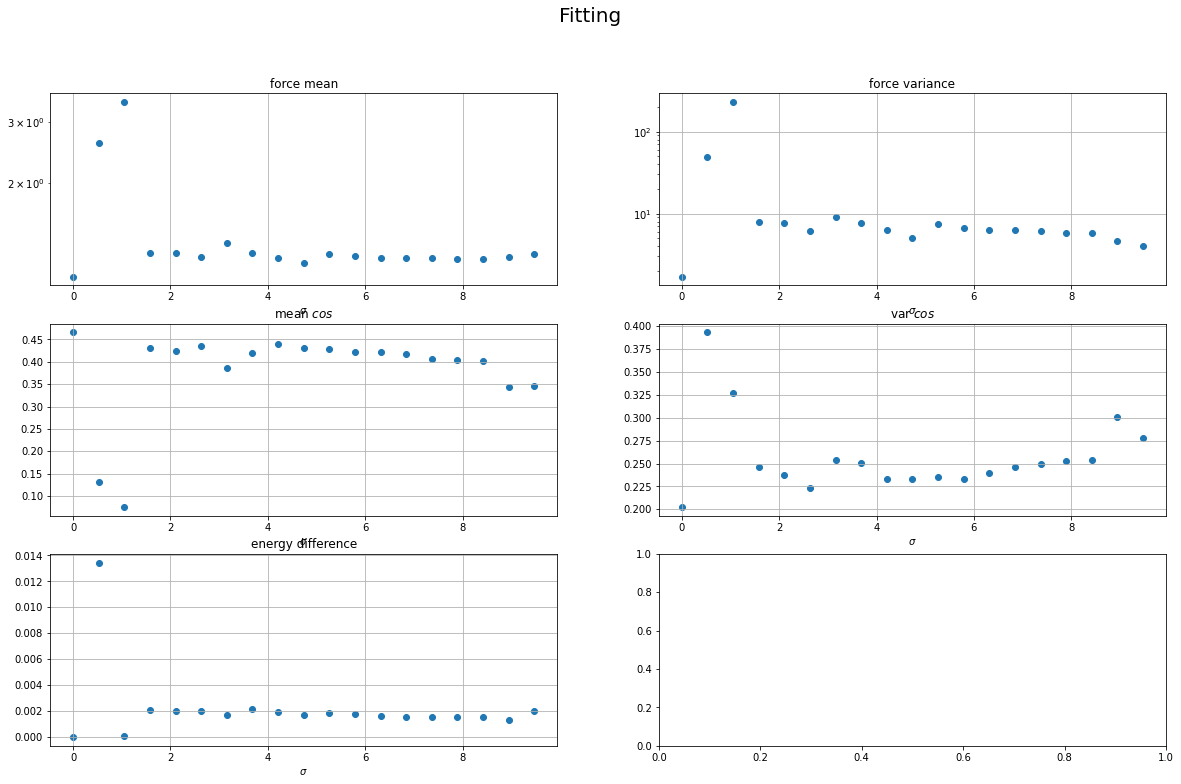

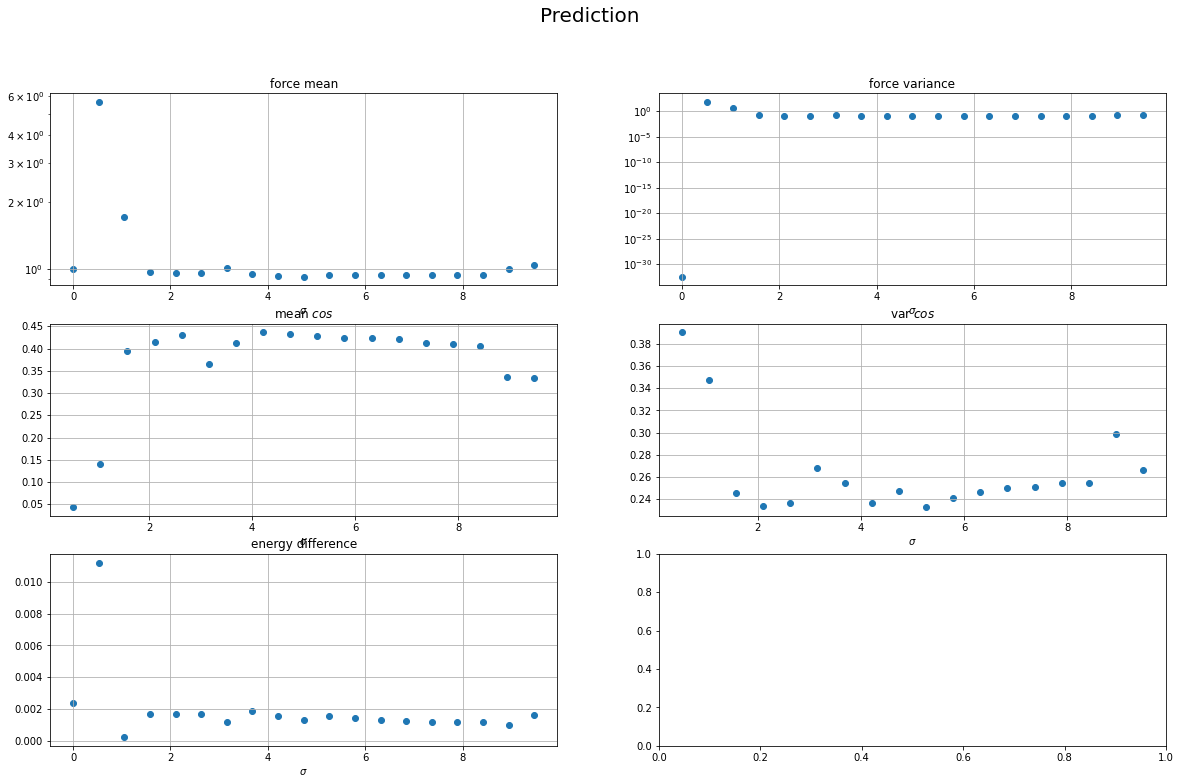

In [71]:
analyze(20, 0, 10, 2, 100)

## modi = 4

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =    4

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-100)_m4_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  3.157902|  0.667069|  2.855818|  0.846438|  0.079527|  0.004009|
  0.000010|  1.347795|  7.063524|  0.449641|  0.304615|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-100)_m4_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  3.157902|  0.495362|  0.171327|  0.865815|  0.046386|  0.002906|
  2.105271|  1.639805|  1.476235|  0.444307|  0.319932|  0.000256|


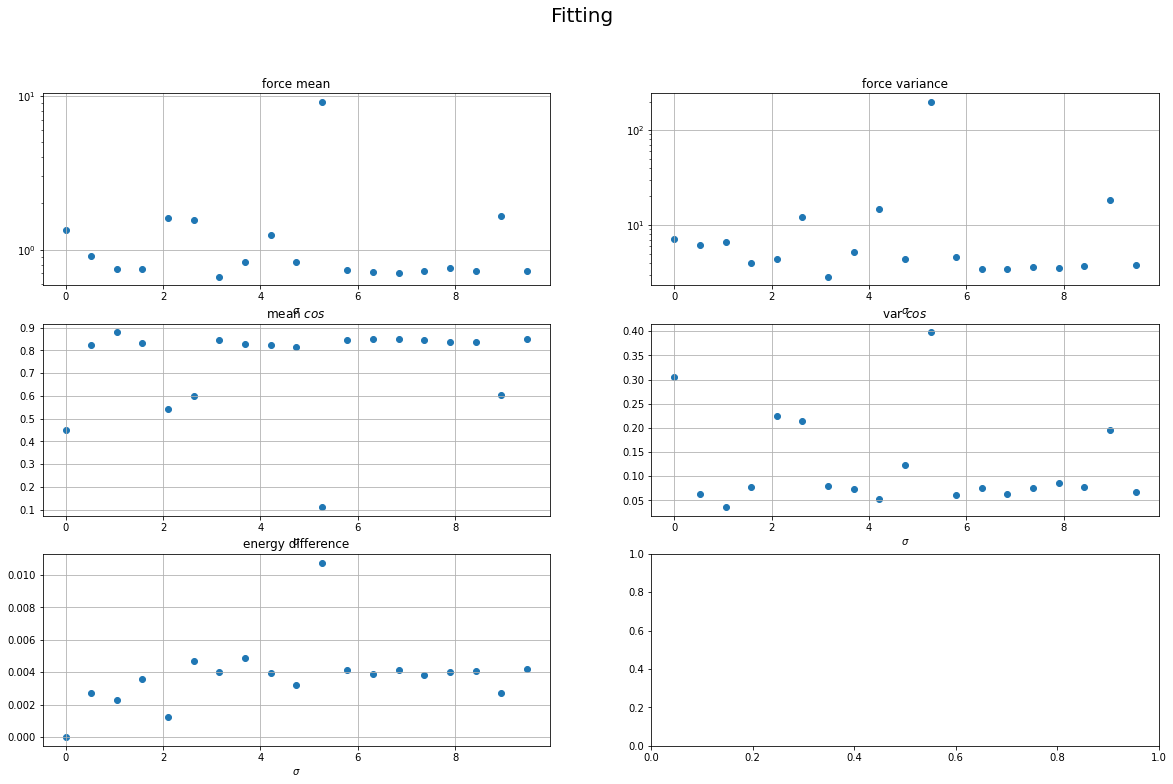

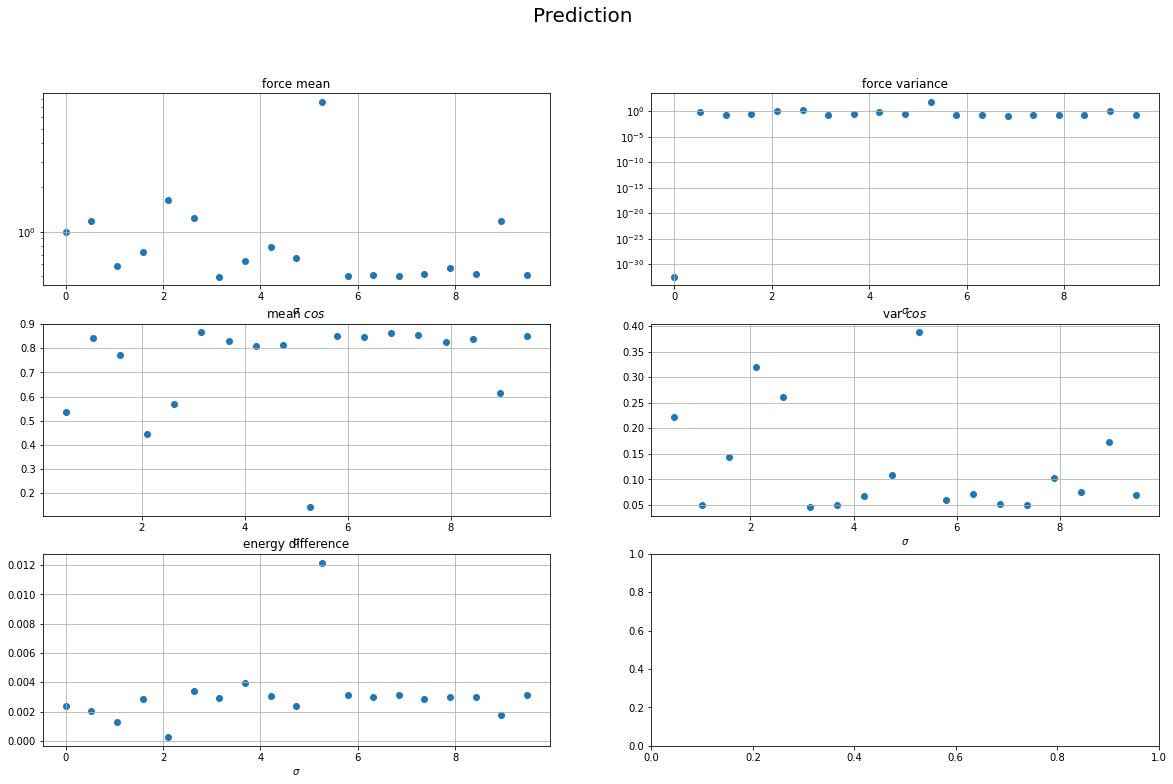

In [72]:
analyze(20, 0, 10, 4, 100)

## modi = 6

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =    6

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-100)_m6_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.736847|  0.583116|  0.683628|  0.848050|  0.086448|  0.005003|
  0.000010|  1.340261|  9.490592|  0.451999|  0.288168|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-100)_m6_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  8.947369|  0.446093|  0.110951|  0.891918|  0.028336|  0.003687|
  1.052641|  1.168484|  1.217154|  0.590582|  0.196158|  0.001197|


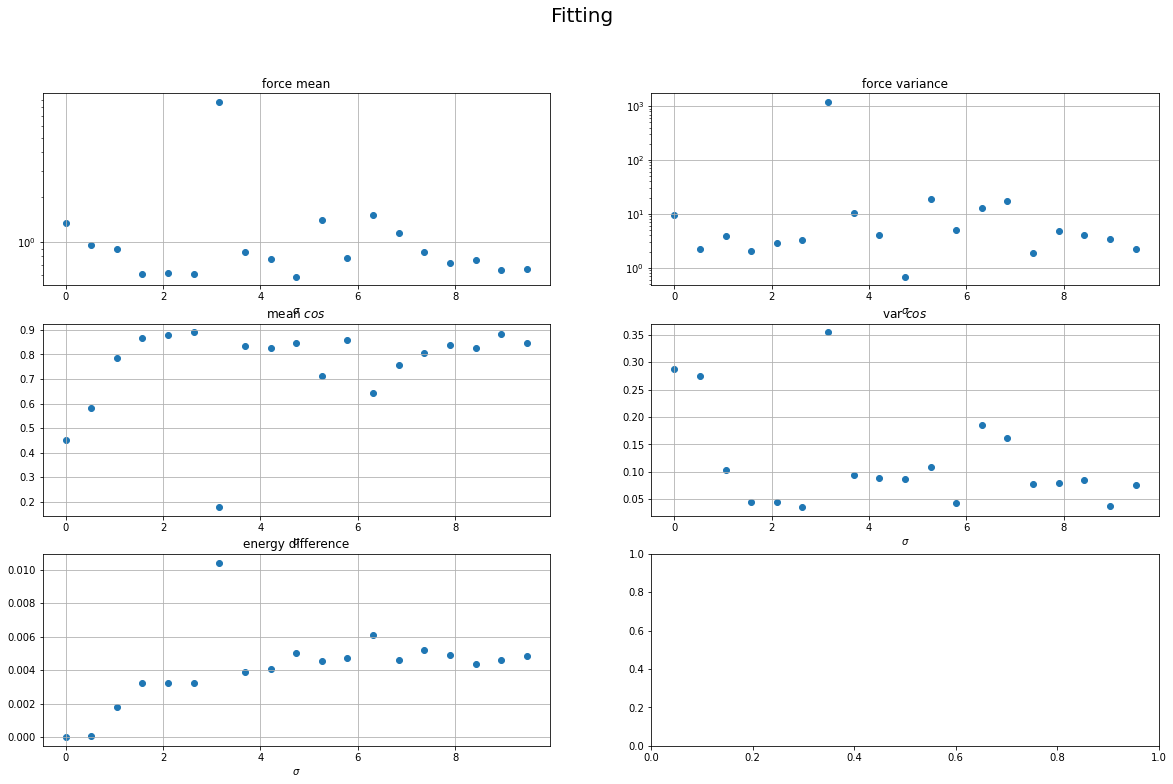

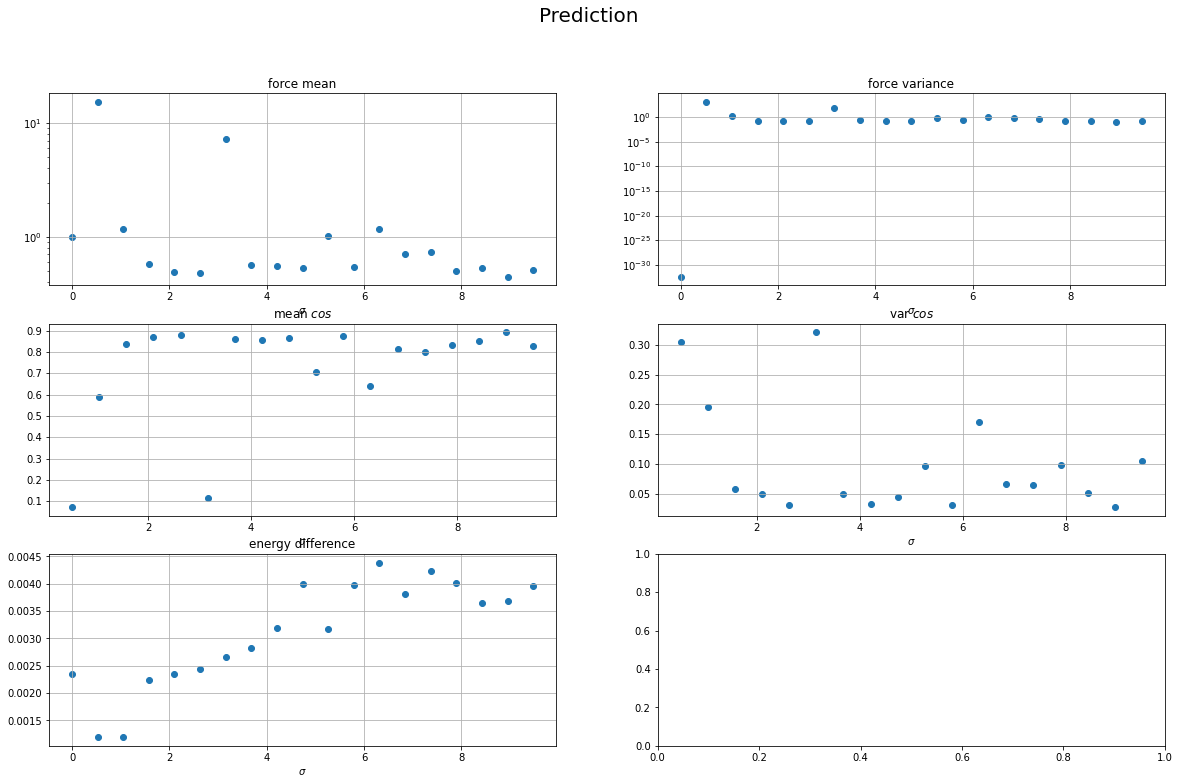

In [73]:
analyze(20, 0, 10, 6, 100)

## modi = 8

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =    8

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-100)_m8_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.736847|  0.438627|  0.588153|  0.925011|  0.017769|  0.003927|
  0.000010|  1.203265|  3.195359|  0.494149|  0.222274|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-100)_m8_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
 10.000000|  0.418778|  0.078169|  0.896897|  0.023868|  0.003172|
  1.052641|  1.703081|  2.037620|  0.432751|  0.302523|  0.000153|


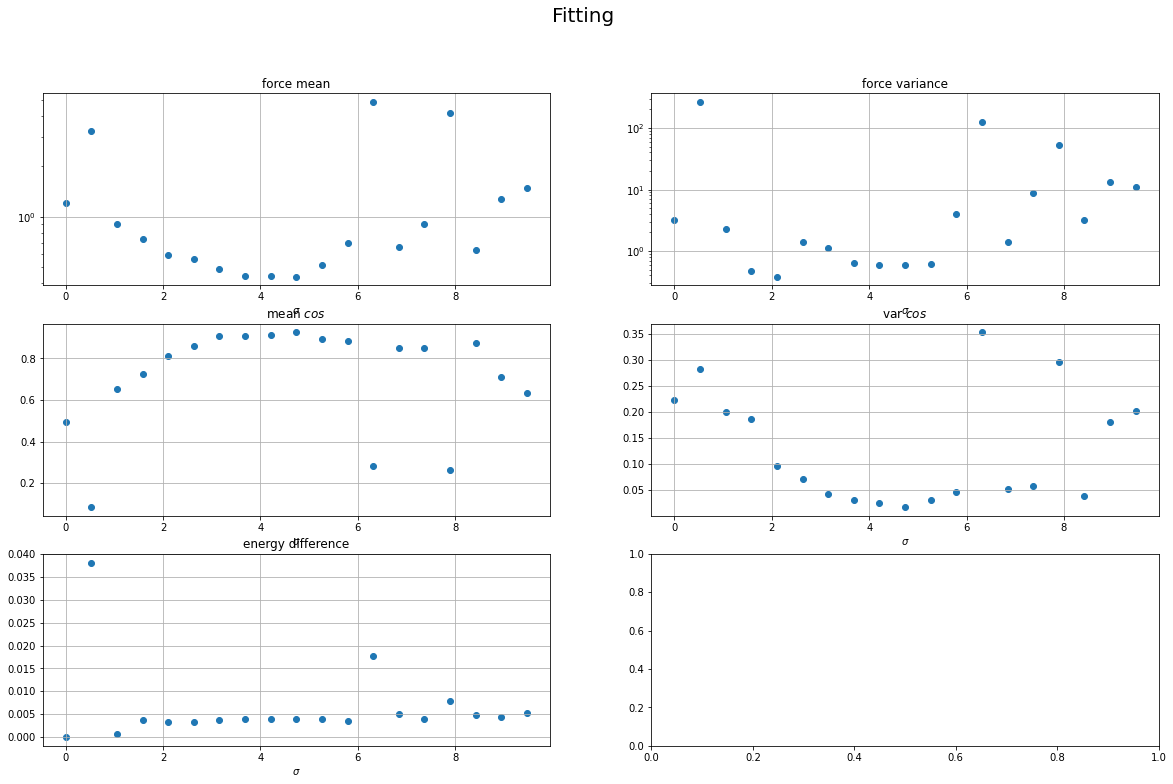

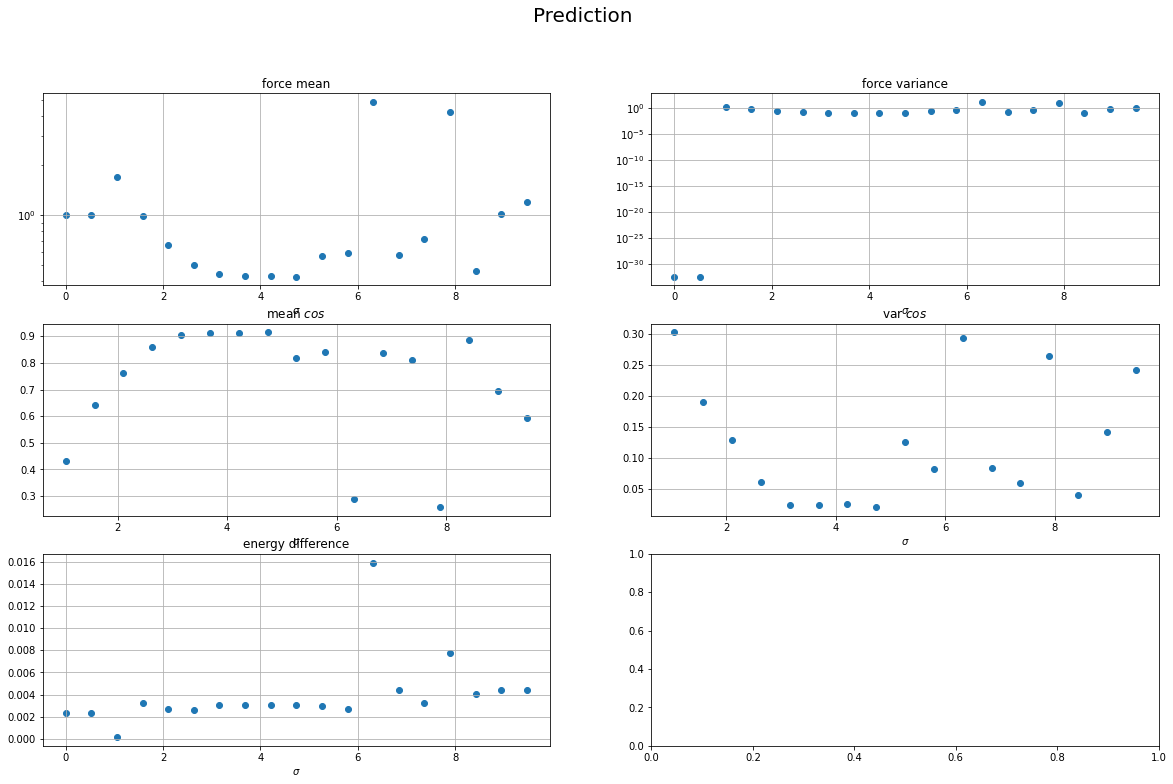

In [74]:
analyze(20, 0, 10, 8, 100)

## modi = 12

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =   12

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-100)_m12_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  9.473685|  0.504307|  2.111410|  0.923799|  0.024713|  0.004178|
  0.526325|  1.138556|  5.196097|  0.593430|  0.193187|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-100)_m12_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.368424|  0.385794|  0.095949|  0.923976|  0.013620|  0.002933|
  1.578956|  3.065207|  8.519276|  0.255688|  0.322805|  0.000485|


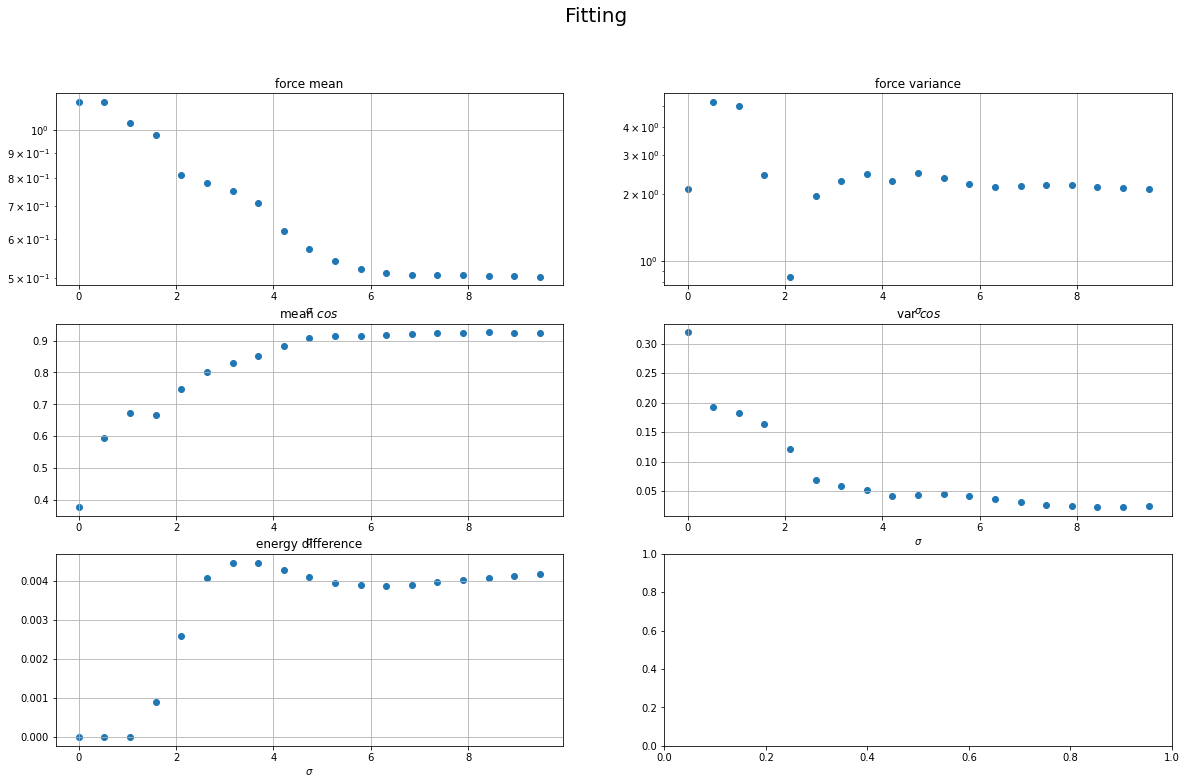

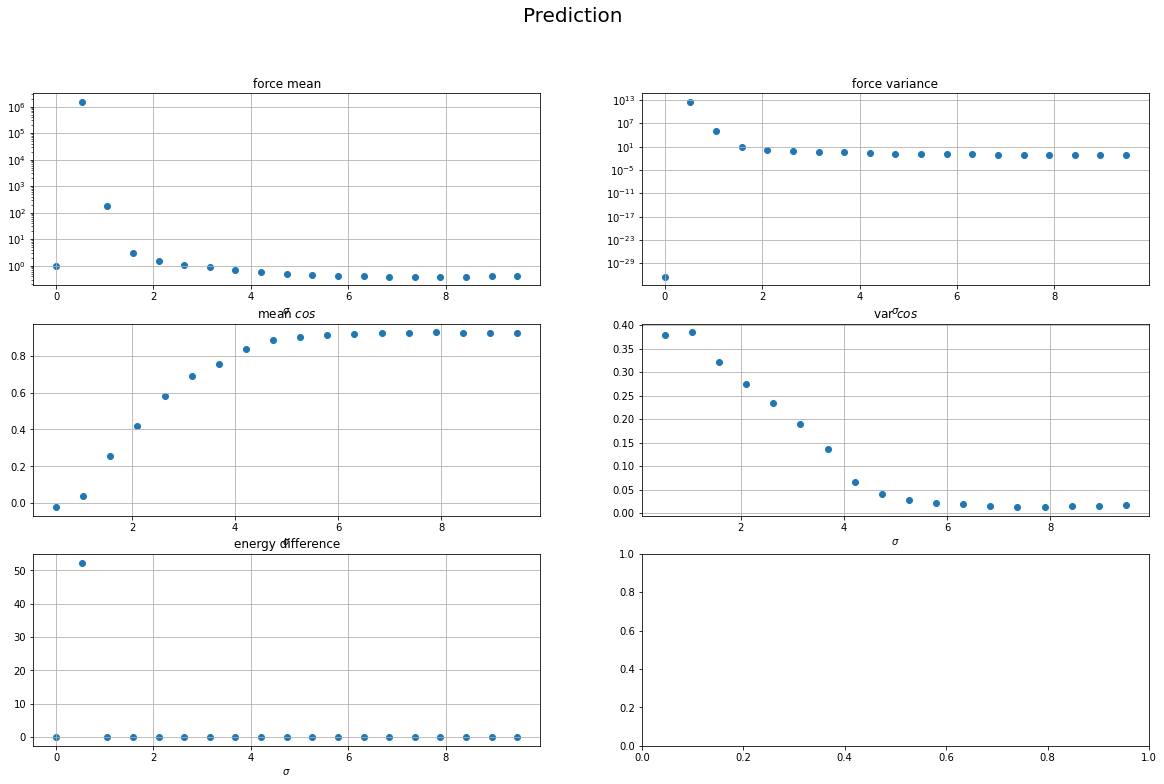

In [75]:
analyze(20, 0, 10, 12, 100)

## modi = 14

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   = 10.0
modi      =   12

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-100)_m12_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  9.473685|  0.504307|  2.111410|  0.923799|  0.024713|  0.004178|
  0.526325|  1.138556|  5.196097|  0.593430|  0.193187|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-100)_m12_s100.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.368424|  0.385794|  0.095949|  0.923976|  0.013620|  0.002933|
  1.578956|  3.065207|  8.519276|  0.255688|  0.322805|  0.000485|


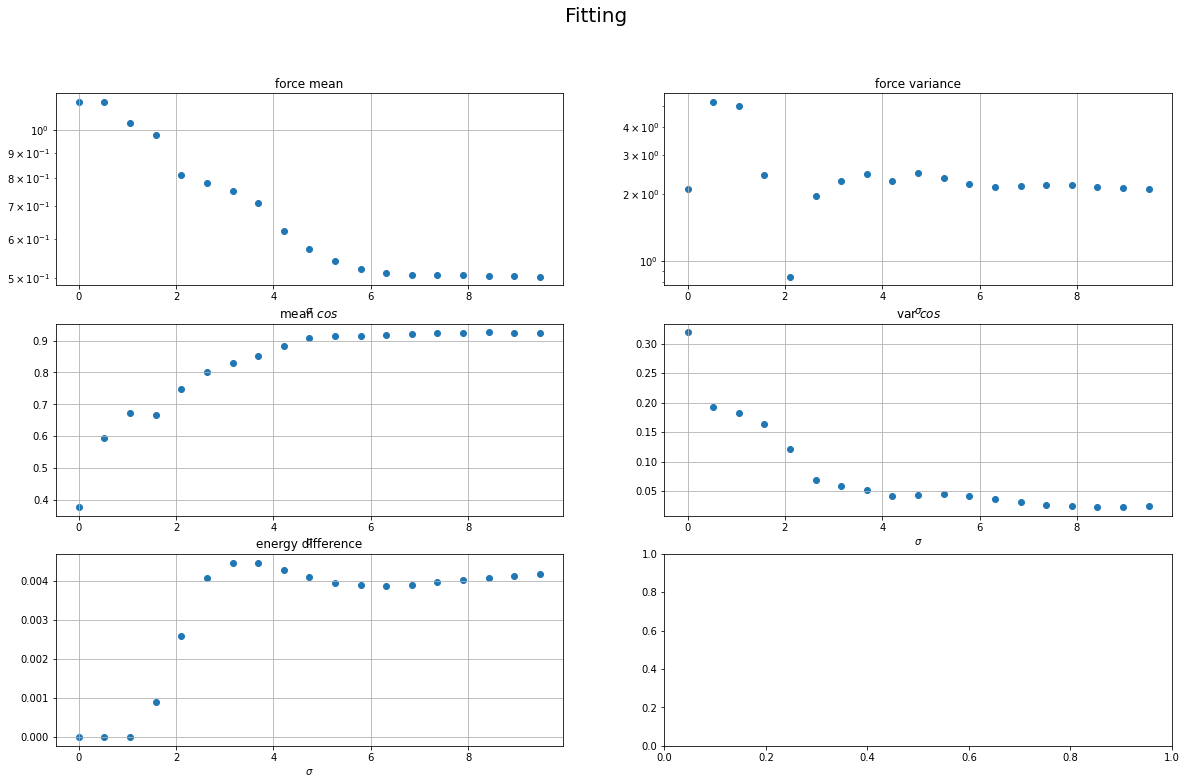

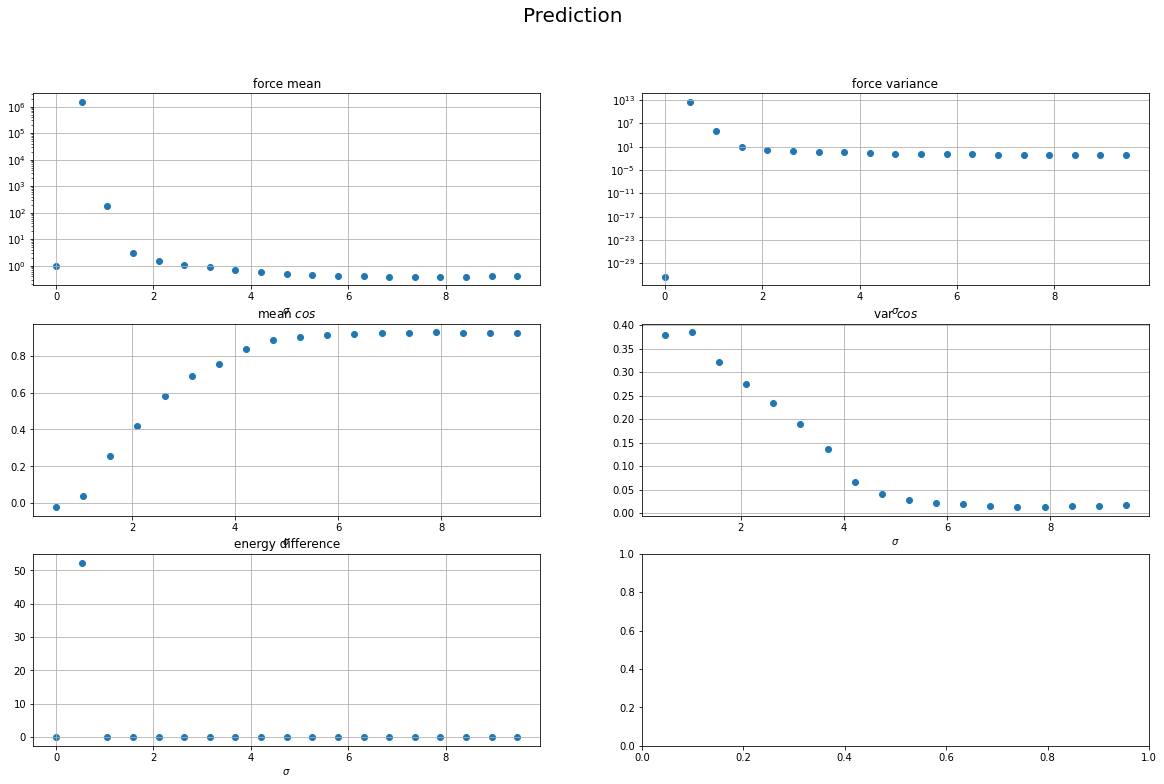

In [76]:
analyze(20, 0, 10, 12, 100)

# Analyzing the influence of the nr of configurations
## Learning on 20 configurations

steps     =   20
min sigma =    0
max sigma =   12
grid      =  0.6
configs   = 20.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-120)_m10_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.421059|  0.540775|  2.784374|  0.911576|  0.028541|  0.003394|
  0.631588|  1.312013| 13.665248|  0.618278|  0.160441|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-120)_m10_s50.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  5.052637|  0.388560|  0.081494|  0.919174|  0.015053|  0.002966|
 10.736843|  2.281118|  3.809645|  0.522592|  0.190148|  0.000088|


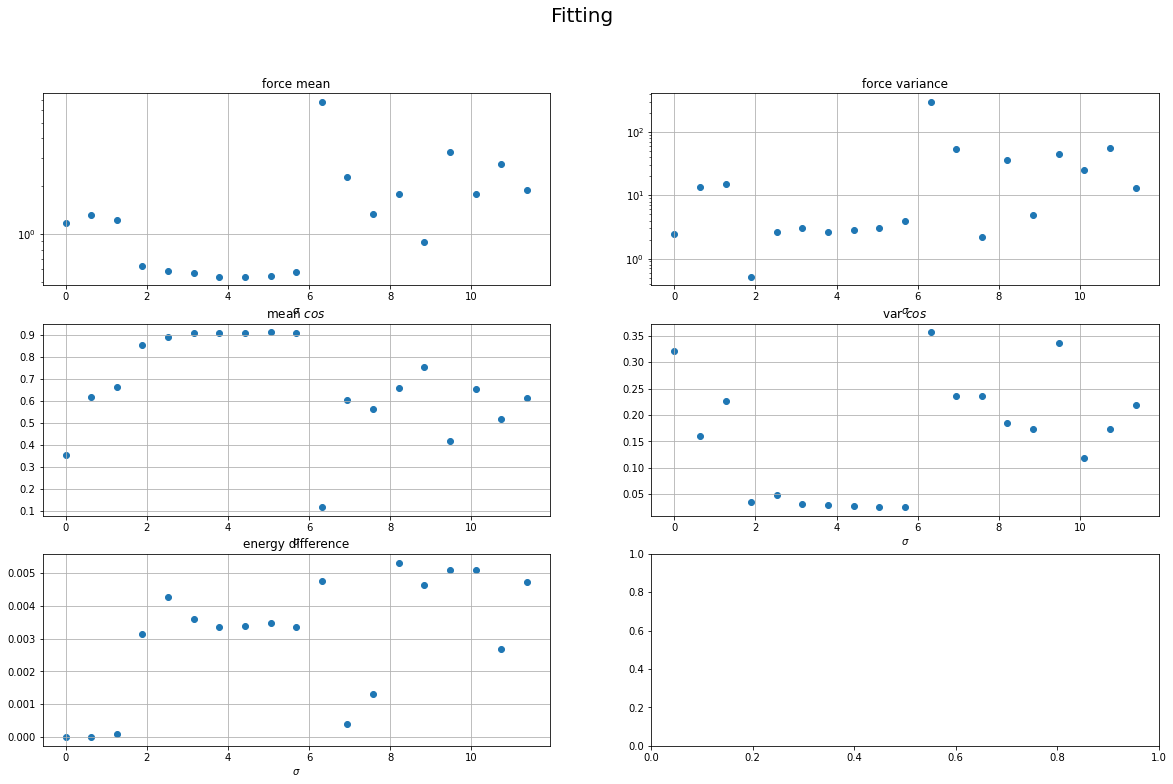

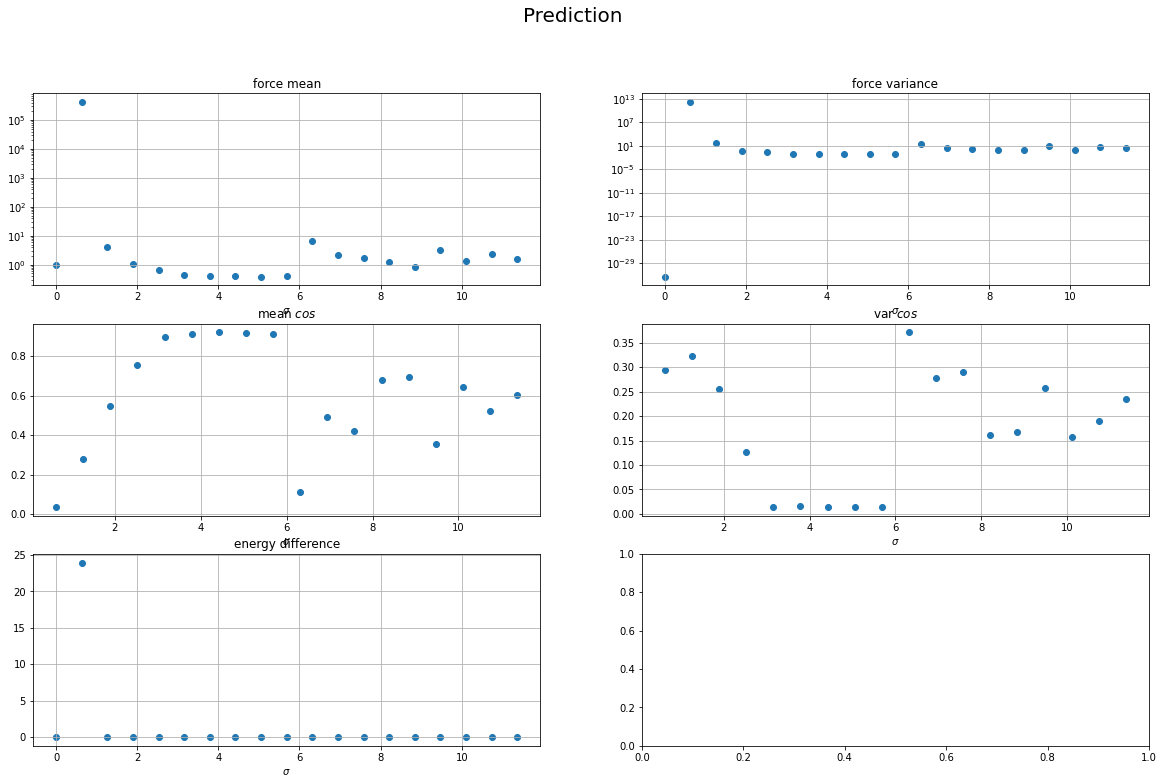

In [77]:
analyze(20, 0, 12, 10, 50)

## Learning on 40 configurations

steps     =   20
min sigma =    0
max sigma =   12
grid      =  0.6
configs   = 40.0
modi      =   10

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-120)_m10_s25.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.421059|  0.505705|  2.491476|  0.929829|  0.014125|  0.003726|
  0.000010|  1.167267|  2.437139|  0.354695|  0.322066|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-120)_m10_s25.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.421059|  0.392697|  0.081805|  0.915967|  0.011551|  0.003211|
  1.263167|  1.825745|  2.038673|  0.305566|  0.402184|  0.000577|


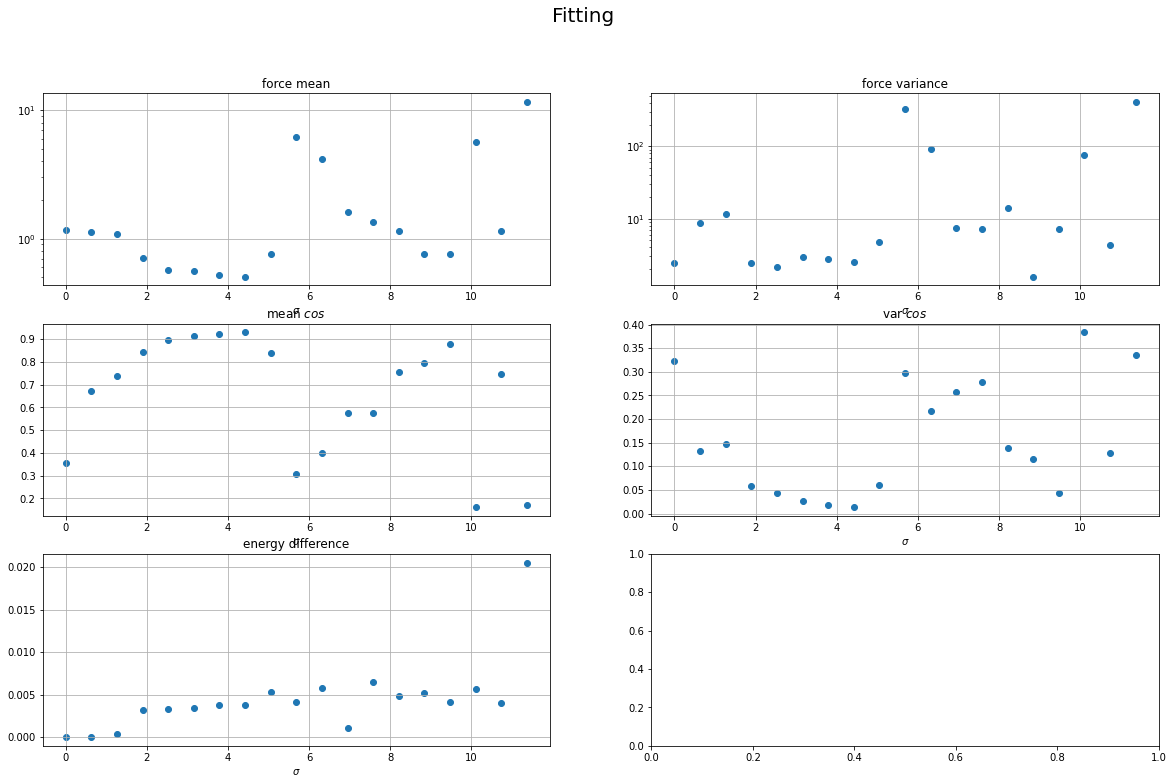

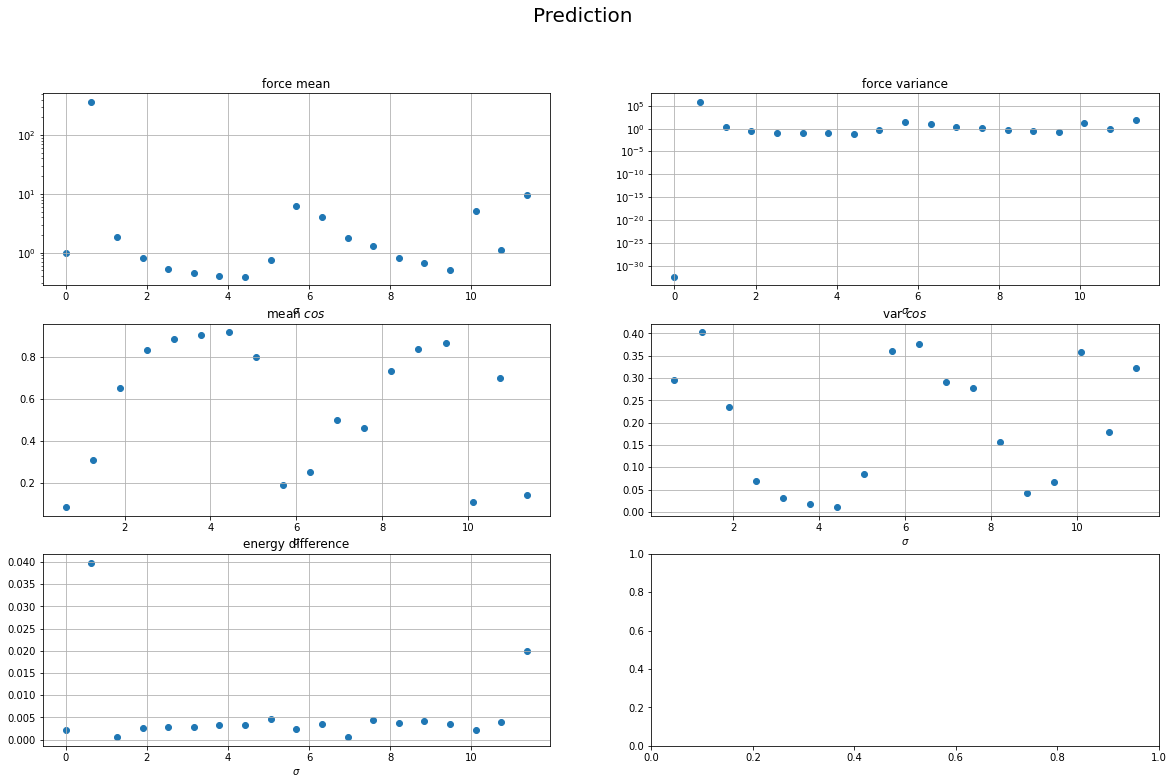

In [78]:
analyze(20, 0, 12, 10, 25)

## Learning on 7 configurations

steps     =   20
min sigma =    0
max sigma =   10
grid      =  0.5
configs   =6.666666666666667
modi      =   10

Minimize values in fit from:
test_data/test_parameters/single_config/fit_20_(00-100)_m10_s150.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  4.736847|  0.452462|  0.592550|  0.895550|  0.033266|  0.003036|
  0.526325|  1.230153|  8.222246|  0.584925|  0.191195|  0.000000|


Minimize values in prediction from:
test_data/test_parameters/single_config/prediction_20_(00-100)_m10_s150.dat
sigma     |mean force|var force |mean cos  |var cos   |energy    |
  7.368424|  0.403901|  0.097263|  0.905525|  0.022685|  0.002295|
  1.578956|  1.581604|  1.274399|  0.353995|  0.354466|  0.000163|


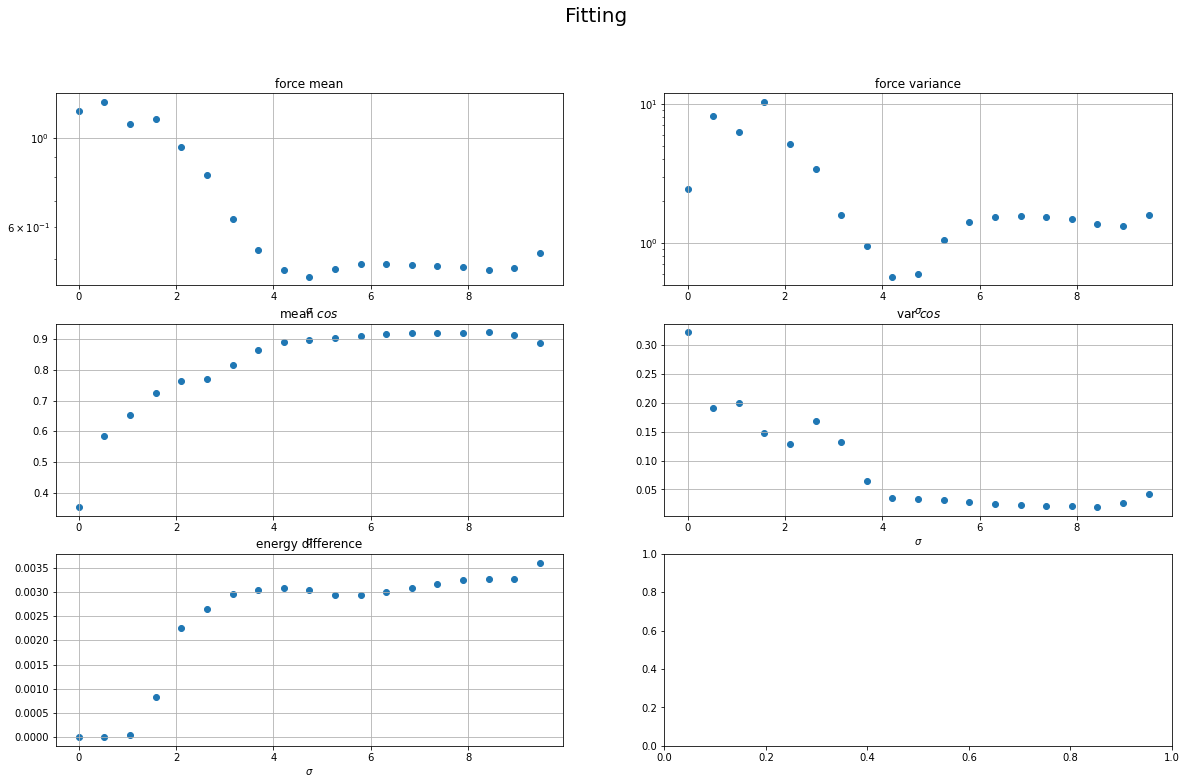

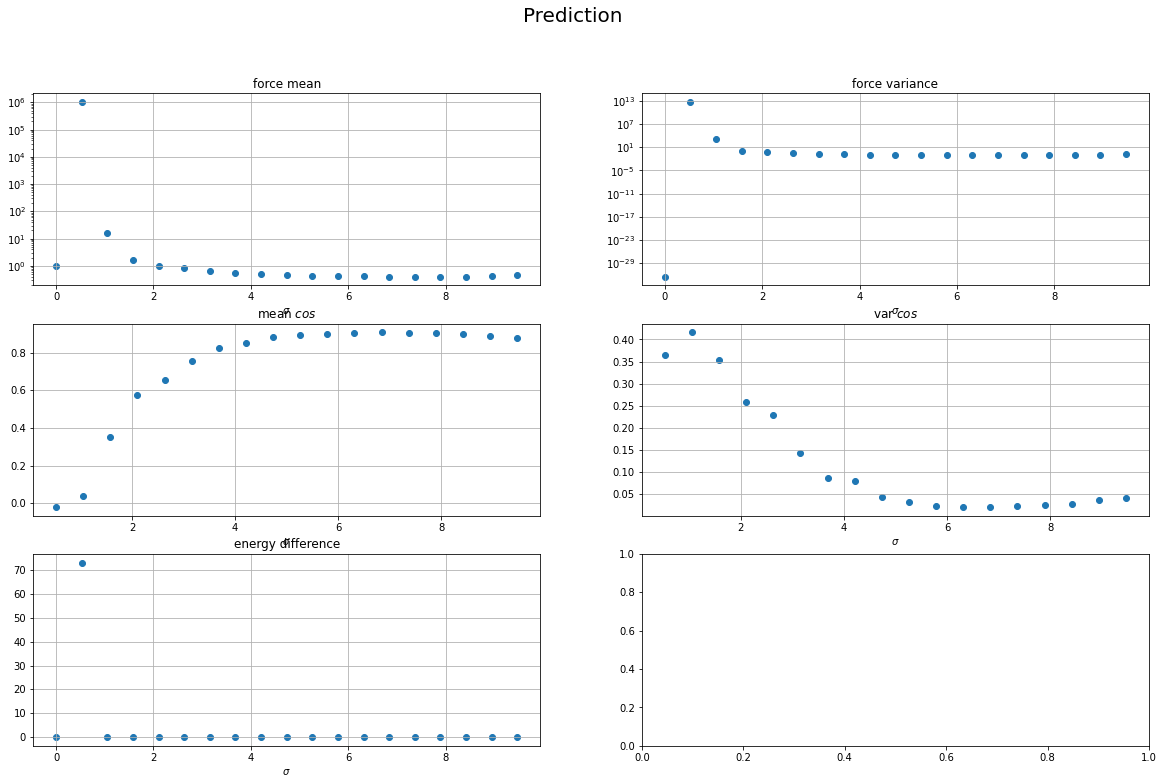

In [79]:
analyze(20, 0, 10, 10, 150)